In [2]:
import pandas as pd 
import numpy as np

In [10]:
df = pd.read_csv("C:/Users/LENOVO/Downloads/Netflix_movies_and_tv_shows_clustering.csv (1)/Netflix_movies_and_tv_shows_clustering.csv")

In [12]:
df.head()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [14]:
df.describe(include='all')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [15]:
df.isnull().sum()


show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [16]:
df = df.drop_duplicates()


In [17]:
df['director'] = df['director'].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['country'] = df['country'].fillna('Unknown')


In [18]:
df = df.dropna(subset=['title', 'type'])


In [19]:
df['type'] = df['type'].str.strip().str.lower().str.capitalize()
df['rating'] = df['rating'].str.strip().str.upper()


In [20]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [21]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


In [22]:
df.dtypes


show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [24]:
df.to_csv("cleaned_netflix_dataset.csv", index=False)


In [25]:
print("✅ Summary of Cleaning:")
print("- Removed duplicates")
print("- Filled missing values in 'director', 'rating', and 'country'")
print("- Dropped rows with missing 'title' or 'type'")
print("- Standardized 'type' and 'rating'")
print("- Converted 'date_added' to datetime format")
print("- Renamed columns for consistency")


✅ Summary of Cleaning:
- Removed duplicates
- Filled missing values in 'director', 'rating', and 'country'
- Dropped rows with missing 'title' or 'type'
- Standardized 'type' and 'rating'
- Converted 'date_added' to datetime format
- Renamed columns for consistency


In [26]:
df['type'].value_counts()
df['rating'].value_counts()
df['country'].value_counts().head(10)


country
United States     2555
India              923
Unknown            507
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Name: count, dtype: int64

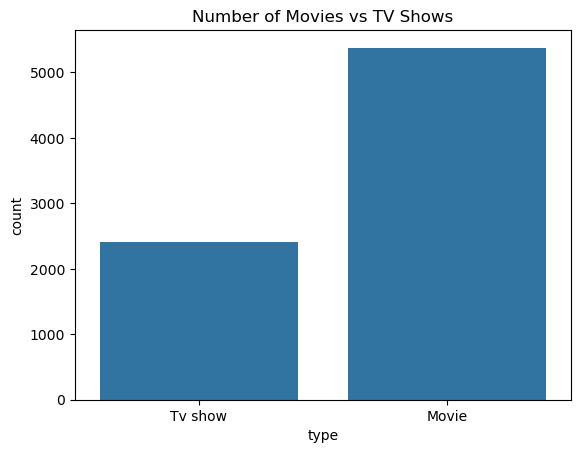

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='type')
plt.title('Number of Movies vs TV Shows')
plt.show()


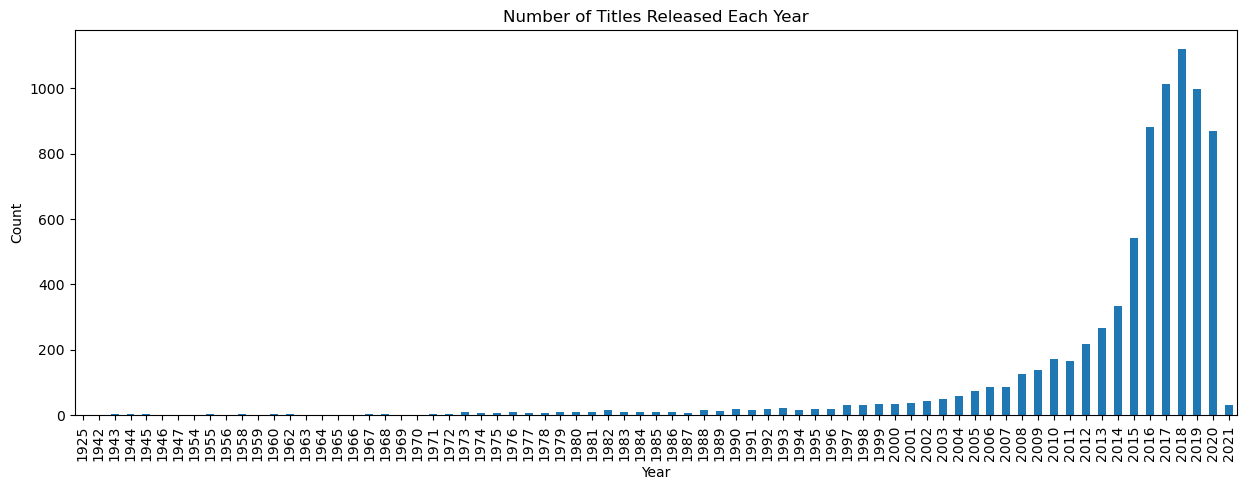

In [28]:
df['release_year'].value_counts().sort_index().plot(kind='bar', figsize=(15,5))
plt.title("Number of Titles Released Each Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()



In [29]:
df['listed_in'].value_counts().head(10)


listed_in
Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Kids' TV                                            205
Children & Family Movies                            177
Documentaries, International Movies                 172
Children & Family Movies, Comedies                  169
Comedies, International Movies                      161
Name: count, dtype: int64